# モデルの学習

In [1]:
# import libraries

import numpy as np
import pandas as pd
import gc
import os
import json
from collections import Counter, defaultdict
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import plotly.express as px
import re
import datetime as dt
import japanize_matplotlib
import itertools
year_pattern = r'([1-2][0-9]{3})'
import time

In [2]:
DATAPATH = "../../../data/DBLP/"
START_YEAR = 2000
END_YEAR = 2020
YEAR_STD = END_YEAR - START_YEAR 

In [4]:
import torch
import torch.utils.data
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import lightgbm as lgb #LightGBM
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

In [5]:
train_x = np.load(DATAPATH + "train_x.npy")
train_y = np.load(DATAPATH + "train_y.npy")

test_x = np.load(DATAPATH + "test_x.npy")
test_y = np.load(DATAPATH + "test_y.npy")
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((1233, 1233, 18), (1233, 1233), (1233, 1233, 18), (1233, 1233))

In [6]:
N = train_x.shape[0]
N

1233

In [7]:
train_x, train_y = train_x.reshape(N*N,18), train_y.reshape(N*N)
test_x, test_y = test_x.reshape(N*N,18), test_y.reshape(N*N)
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((1520289, 18), (1520289,), (1520289, 18), (1520289,))

In [9]:
model = lgb.LGBMRegressor()
start_time = time.perf_counter()
model.fit(train_x, train_y)
print("フィッティング時間: {}".format(time.perf_counter() - start_time))
start_time = time.perf_counter()
model.score(test_x, test_y)
print("スコア時間: {}".format(time.perf_counter() - start_time))

フィッティング時間: 1.634641595184803
スコア時間: 0.5461382009088993


In [10]:
result = model.predict(test_x)
result.shape

(1520289,)

In [11]:
pearsonr(result.reshape(-1), test_y.reshape(-1))

(0.525205896929491, 0.0)

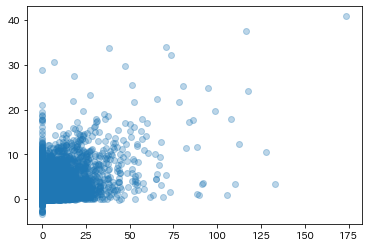

In [12]:
plt.scatter(test_y, result, alpha=0.3)